Let's try to process the new `sst` data so that it matches the time intervals in our exisiting `hurricanes.csv`.  

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn-pastel')
from statsmodels.tsa.vector_ar.var_model import VAR

First of all what does the new data set with the new external data sources look like?  

In [2]:
df = pd.read_csv("hurricanes_augmented.csv", parse_dates=["Date"])

In [3]:
df

,id,Name,Date_string,Time_string,Event,Status,Latitude,Longitude,MaxiumWind,MinimumPressure,Date,sst,Lat,Long,oni_score,oni_flag
0,AL012007,ANDREA,20070506,1200,,EX,35.5,-74.0,35,1012,2007-05-06,22.991250,36,-74,-0.3,0
1,AL012007,ANDREA,20070506,1800,,EX,35.0,-73.0,40,1009,2007-05-06,21.806250,35,-73,-0.3,0
2,AL012007,ANDREA,20070507,0,,EX,34.3,-71.7,50,1005,2007-05-07,21.414999,34,-72,-0.3,0
3,AL012007,ANDREA,20070507,600,,EX,33.3,-72.3,65,998,2007-05-07,20.699999,33,-72,-0.3,0
4,AL012007,ANDREA,20070507,1200,,EX,32.3,-73.1,65,998,2007-05-07,20.180624,32,-73,-0.3,0
5,AL012007,ANDREA,20070507,1800,,EX,31.5,-74.0,65,998,2007-05-07,21.098125,32,-74,-0.3,0
6,AL012007,ANDREA,20070508,0,,EX,31.0,-74.9,55,1000,2007-05-08,21.783125,31,-75,-0.3,0
7,AL012007,ANDREA,20070508,600,,EX,30.7,-76.0,50,1001,2007-05-08,21.114374,31,-76,-0.3,0
8,AL012007,ANDREA,20070508,1200,,EX,30.4,-77.2,50,1001,2007-05-08,23.751875,30,-77,-0.3,0
9,AL012007,ANDREA,20070508,1800,,EX,30.4,-77.9,50,1001,2007-05-08,24.596874,30,-78,-0.3,0


Yes! We have our sea surface temperatures added here.  

In [6]:
df['Date_Time'] = pd.to_datetime(df.Date, format = '%d/%m/%Y %H:%M')

In [7]:
df

,id,Name,Date_string,Time_string,Event,Status,Latitude,Longitude,MaxiumWind,MinimumPressure,Date,sst,Lat,Long,oni_score,oni_flag,Date_Time
0,AL012007,ANDREA,20070506,1200,,EX,35.5,-74.0,35,1012,2007-05-06,22.991250,36,-74,-0.3,0,2007-05-06
1,AL012007,ANDREA,20070506,1800,,EX,35.0,-73.0,40,1009,2007-05-06,21.806250,35,-73,-0.3,0,2007-05-06
2,AL012007,ANDREA,20070507,0,,EX,34.3,-71.7,50,1005,2007-05-07,21.414999,34,-72,-0.3,0,2007-05-07
3,AL012007,ANDREA,20070507,600,,EX,33.3,-72.3,65,998,2007-05-07,20.699999,33,-72,-0.3,0,2007-05-07
4,AL012007,ANDREA,20070507,1200,,EX,32.3,-73.1,65,998,2007-05-07,20.180624,32,-73,-0.3,0,2007-05-07
5,AL012007,ANDREA,20070507,1800,,EX,31.5,-74.0,65,998,2007-05-07,21.098125,32,-74,-0.3,0,2007-05-07
6,AL012007,ANDREA,20070508,0,,EX,31.0,-74.9,55,1000,2007-05-08,21.783125,31,-75,-0.3,0,2007-05-08
7,AL012007,ANDREA,20070508,600,,EX,30.7,-76.0,50,1001,2007-05-08,21.114374,31,-76,-0.3,0,2007-05-08
8,AL012007,ANDREA,20070508,1200,,EX,30.4,-77.2,50,1001,2007-05-08,23.751875,30,-77,-0.3,0,2007-05-08
9,AL012007,ANDREA,20070508,1800,,EX,30.4,-77.9,50,1001,2007-05-08,24.596874,30,-78,-0.3,0,2007-05-08


In [8]:
df.index = df.Date

In [9]:
df

,id,Name,Date_string,Time_string,Event,Status,Latitude,Longitude,MaxiumWind,MinimumPressure,Date,sst,Lat,Long,oni_score,oni_flag,Date_Time
Date,,,,,,,,,,,,,,,,,
2007-05-06,AL012007,ANDREA,20070506,1200,,EX,35.5,-74.0,35,1012,2007-05-06,22.991250,36,-74,-0.3,0,2007-05-06
2007-05-06,AL012007,ANDREA,20070506,1800,,EX,35.0,-73.0,40,1009,2007-05-06,21.806250,35,-73,-0.3,0,2007-05-06
2007-05-07,AL012007,ANDREA,20070507,0,,EX,34.3,-71.7,50,1005,2007-05-07,21.414999,34,-72,-0.3,0,2007-05-07
2007-05-07,AL012007,ANDREA,20070507,600,,EX,33.3,-72.3,65,998,2007-05-07,20.699999,33,-72,-0.3,0,2007-05-07
2007-05-07,AL012007,ANDREA,20070507,1200,,EX,32.3,-73.1,65,998,2007-05-07,20.180624,32,-73,-0.3,0,2007-05-07
2007-05-07,AL012007,ANDREA,20070507,1800,,EX,31.5,-74.0,65,998,2007-05-07,21.098125,32,-74,-0.3,0,2007-05-07
2007-05-08,AL012007,ANDREA,20070508,0,,EX,31.0,-74.9,55,1000,2007-05-08,21.783125,31,-75,-0.3,0,2007-05-08
2007-05-08,AL012007,ANDREA,20070508,600,,EX,30.7,-76.0,50,1001,2007-05-08,21.114374,31,-76,-0.3,0,2007-05-08
2007-05-08,AL012007,ANDREA,20070508,1200,,EX,30.4,-77.2,50,1001,2007-05-08,23.751875,30,-77,-0.3,0,2007-05-08


In [12]:
data = df.drop(['Date_Time', 'Date_string', 'Date'], axis=1)

In [14]:
data.head()

,id,Name,Time_string,Event,Status,Latitude,Longitude,MaxiumWind,MinimumPressure,sst,Lat,Long,oni_score,oni_flag
Date,,,,,,,,,,,,,,
2007-05-06,AL012007,ANDREA,1200,,EX,35.5,-74.0,35,1012,22.991250,36,-74,-0.3,0
2007-05-06,AL012007,ANDREA,1800,,EX,35.0,-73.0,40,1009,21.806250,35,-73,-0.3,0
2007-05-07,AL012007,ANDREA,0,,EX,34.3,-71.7,50,1005,21.414999,34,-72,-0.3,0
2007-05-07,AL012007,ANDREA,600,,EX,33.3,-72.3,65,998,20.699999,33,-72,-0.3,0
2007-05-07,AL012007,ANDREA,1200,,EX,32.3,-73.1,65,998,20.180624,32,-73,-0.3,0


In [15]:
data.tail()

,id,Name,Time_string,Event,Status,Latitude,Longitude,MaxiumWind,MinimumPressure,sst,Lat,Long,oni_score,oni_flag
Date,,,,,,,,,,,,,,
2017-11-08,AL192017,RINA,1200,,TS,38.3,-48.8,45,994,22.681250,38,-49,-0.9,-1
2017-11-08,AL192017,RINA,1800,,TS,40.1,-49.0,45,992,23.260624,40,-49,-0.9,-1
2017-11-09,AL192017,RINA,0,,TS,41.8,-48.8,45,991,15.672500,42,-49,-0.9,-1
2017-11-09,AL192017,RINA,600,,LO,43.6,-48.0,40,993,11.883750,44,-48,-0.9,-1
2017-11-09,AL192017,RINA,1200,,LO,45.5,-47.0,40,995,8.805625,46,-47,-0.9,-1


Looks like once we added the `sst`, the range of years for our data changed from 1851-2017 to 2007-2017.  

Text(0.5,1,'Sea Surface Temperature')

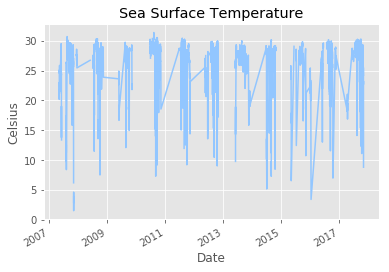

In [29]:
data.sst.plot()
plt.ylabel('Celsius')
plt.title("Sea Surface Temperature")
# plt.savefig("img/sst-2007-2017.png")

In [30]:
#check the dtypes
data.dtypes

id                  object
Name                object
Time_string          int64
Event               object
Status              object
Latitude           float64
Longitude          float64
MaxiumWind           int64
MinimumPressure      int64
sst                float64
Lat                  int64
Long                 int64
oni_score          float64
oni_flag             int64
dtype: object

look at missing values

In [49]:
data.sst.isnull().sum()

343

In [52]:
data.sst.describe()

count    4937.000000
mean       26.308857
std         4.056583
min         1.536667
25%        25.792500
50%        27.697500
75%        28.626875
max        31.403570
Name: sst, dtype: float64

In [31]:
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

In [33]:
np.asarray(train).dtype

dtype('O')

In [34]:
train.columns

Index(['id', 'Name', 'Time_string', 'Event', 'Status', 'Latitude', 'Longitude',
       'MaxiumWind', 'MinimumPressure', 'sst', 'Lat', 'Long', 'oni_score',
       'oni_flag'],
      dtype='object')

OK, so clearly we need to filter for the variables of interest.  

In [35]:
train_clean = train[['MinimumPressure', 'sst']]
valid_clean = train[['MinimumPressure', 'sst']]

In [42]:
train_clean.head()

,MinimumPressure,sst
Date,,
2007-05-06,1012,22.991250
2007-05-06,1009,21.806250
2007-05-07,1005,21.414999
2007-05-07,998,20.699999
2007-05-07,998,20.180624


Average by each day.

In [43]:
# https://stackoverflow.com/questions/47475929/average-pandas-dataframe-by-date
train_clean.groupby(train_clean.index.floor('d')).mean()

,MinimumPressure,sst
Date,,
2007-05-06,1010.500000,22.398750
2007-05-07,999.750000,20.848437
2007-05-08,1000.750000,22.811562
2007-05-09,1002.000000,24.748906
2007-05-10,1003.000000,24.550937
2007-05-11,1004.500000,25.637384
2007-05-12,1006.000000,24.545156
2007-05-13,1006.500000,23.422968
2007-05-14,1007.000000,21.480625


In [44]:
model = VAR(endog=train_clean)
# model = VAR(endog=train.astype(float))
model_fit = model.fit()

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


ValueError: On entry to DGELSD parameter number 4 had an illegal value